<a href="https://colab.research.google.com/github/harnalashok/deeplearning/blob/main/KL_Divergence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Last amended: 26th Oct, 2023
# Kullback Liebler divergence
# Information content
# Claude Shannon's definition of self-information was chosen to meet several axioms:
#  https://en.wikipedia.org/wiki/Information_content

## Shannon's information theory

The Shannon information can be interpreted as quantifying the level of "surprise" of a particular outcome.

Claude Shannon's definition of self-information was chosen to meet several axioms:

>An event with probability 100% is perfectly unsurprising and yields no information.

>    The less probable an event is, the more surprising it is and the more information it yields.

>  If two independent events are measured separately, the total amount of information is the sum of the self-informations of the individual events.

 The function of probability that meets these three axioms, up to a multiplicative scaling factor. Broadly, given a real number b > 1 and an event x with probability P, the information content is defined as follows:

 >>  I(x) = -$log_{b}$(p(x))   

 The base b corresponds to the scaling factor above. Different choices of b correspond to different units of information: when b = 2, the unit is the shannon (symbol Sh), often called a 'bit'; when b = e, the unit is the natural unit of information (symbol nat); and when b = 10, the unit is the hartley (symbol Hart).

For a given probability space, the measurement of rarer events are intuitively more "surprising", and yield more information content, than more common values. Thus, self-information is a strictly decreasing monotonic function of the probability, or sometimes called an "antitonic" function.

While standard probabilities are represented by real numbers in the interval [ 0 , 1 ], self-informations are represented by extended real numbers in the interval [ 0 , ∞ ] . In particular, we have the following, for any choice of logarithmic base:

>If a particular event has a 100% probability of occurring, then its self-information is − log ⁡ ( 1 ) = 0  its occurrence is "perfectly non-surprising" and yields no information.


>If a particular event has a 0% probability of occurring, then its self-information is − log ⁡ ( 0 ) = ∞ : its occurrence is "infinitely surprising".

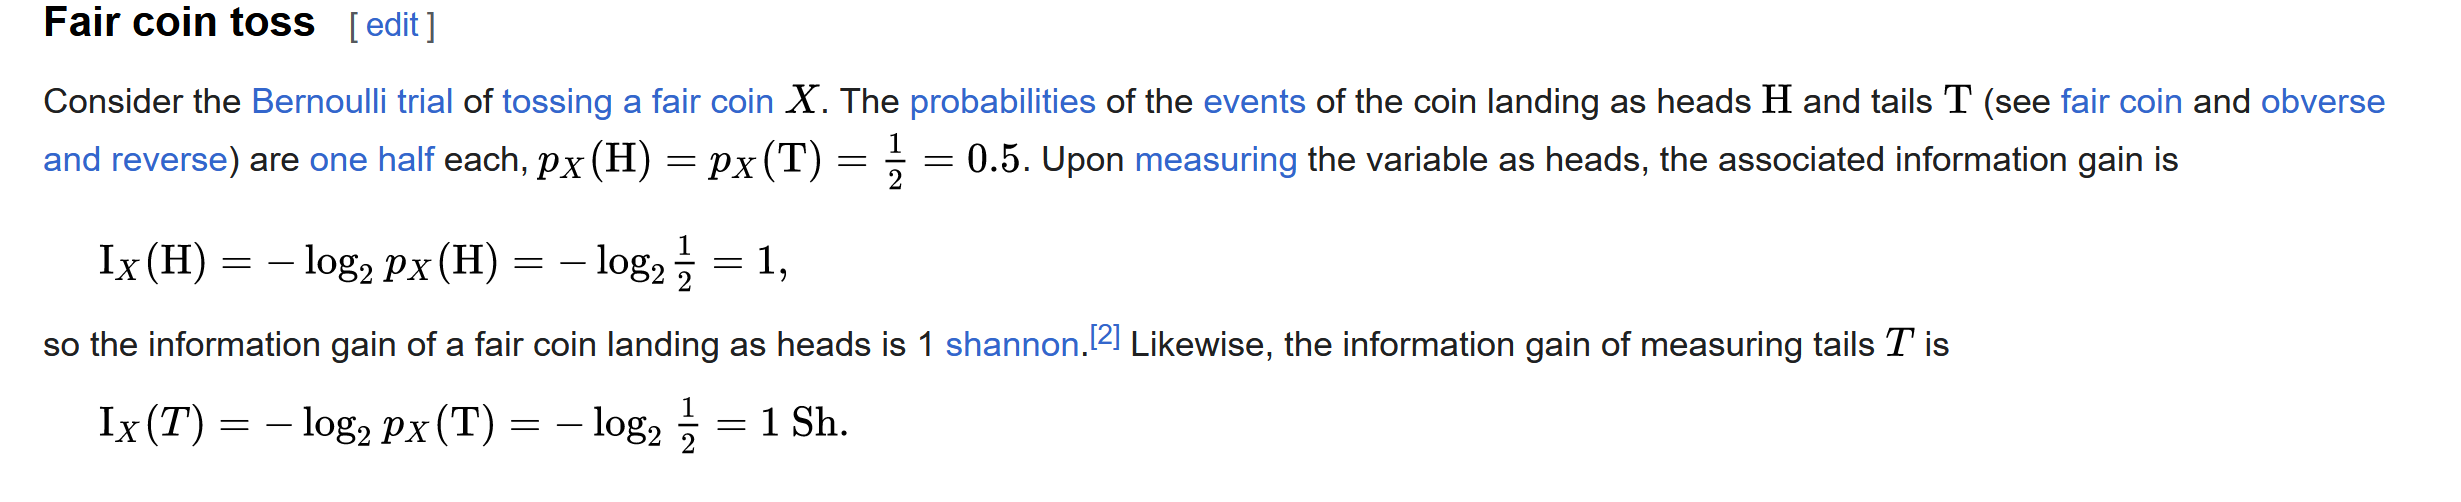

The above can be interpreted as number of bits required to transmit information about event H is 1 and about event T is 1. Or in other words `-log(p(x))` gives us the number of bits required to transmit information about (x).

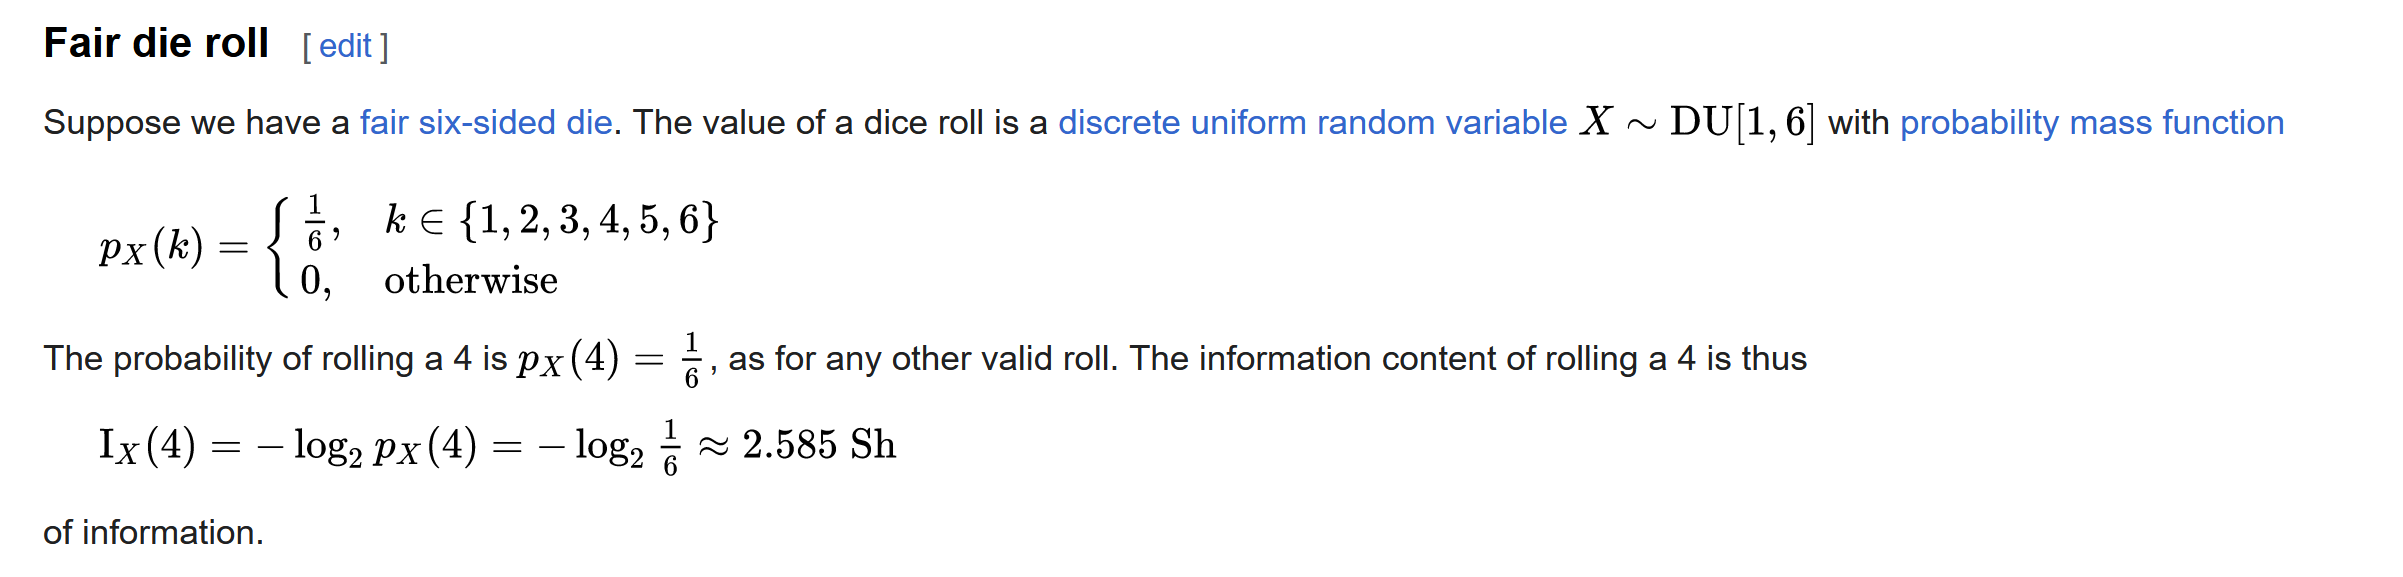

### Another example

Assume a coin is tossed 10 times, and sample data is as below:   
H, T, H, H, T, H, T, T, H, H	H->6, T->4    

So, based upon above sample, we surmise that probability of Head and Tail are:
P(H) = 0.6, P(T) = 0.4 and accordingy devise a coding scheme.

Information content of Head is:  
> Log2(1/0.6) = 0.736 bit

And information content of Tail is:

>Log2(1/0.4) = 1.32 bits


Our bit-coding scheme will be devised accordingly. However, the coins are actually fair. So the average information content of the Random Process of coin toss as per wrongly assumed distribution would be:   

> 0.5 * Log2(1/0.6)  + 0.5 * Log2(1/0.4) = 0.37 + 0.66 = 1.029 bits,

The above says that on an average, we are transmitting, information content of Log2(1/0.6), 50% time and Log2(1/0.4), another 50% time.  

Or, on average (a minimum of) 1.029 bits will be required to transmit this message.    

Why?   

However, if we code as per the actual distribution, then the information content being transmitted would be:   

> 0.5 * log2(1/0.5) + 0.5 * log2(1/0.5) = log2(1/0.5) = 1bit   


So the KL divergence is:    

Number of extra-bits required to transmit the message assuming wrong distribution:   
> 1.029 – 1 = 0.029 bit.


### Another example   
From [colah's blog](https://colah.github.io/posts/2015-09-Visual-Information/)


Four words are transmitted. These words occur with the following probability:


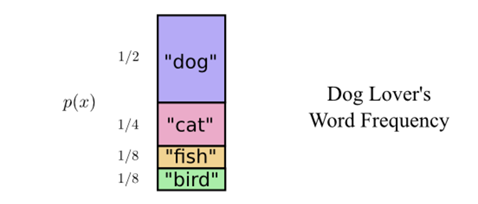

However, coding scheme is designed based upon a distribution of equal frequency, as below:

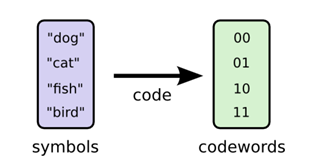

Average no of bits required to transmit message based upon Q:  

> 0.5 * log2(1/0.25) + 0.25 * log2(1/0.25) + 0.125 * log2(1/0.25) + 0.125 * log2(1/0.25)  

> = log2(1/0.25) = log2(22) = 2  



Average number of bits required if coding scheme is exactly as per P:   

> 0.5 * log2(1/0.5) + 0.25 * log2(1/0.25) + 0.125 * log2(1/0.125) + 0.125 * log2(1/0.125) =1.75   

Therefore, extra bits required assuming the wrong distribution: 2- 1.75 = 0.25
(Note: You can enter the following formula in Excel (copy and paste) to calculate above)   

>=0.5 * LOG(1/0.5,2) + 0.25 * LOG(1/0.25,2) + 0.125 * LOG(1/0.125,2) + 0.125 * LOG(1/0.125,2)


Ideal coding scheme
If your coding scheme is as below, then average number of bits required will be exactly 1.75


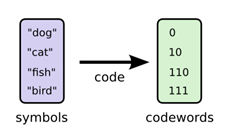

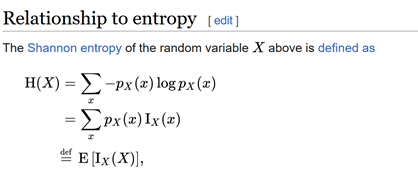

The intuition for entropy is that it is the average number of bits required to represent or transmit an event drawn from the probability distribution for the random variable.

### Cross-entropy

In information theory, the cross-entropy between two probability distributions p and q over the same underlying set of events measures the average number of bits needed to identify an event drawn from the set if a coding scheme used for the set is optimized for an estimated probability distribution q, rather than the true distribution p.

Assume events are a,b,c that actually occur with probabiities p1,p2 and p3. But distribution assumed is q1, q2 and q3. Thus coding scheme will be designed as per distribution q1, q2 and q3. Therefore, bits transmitted will be log(1/q1), log(1/q2) and log(1/q3) when q1 or q2 or q3 occur. Since they will occur on an average with probabilities p1,p2, p3, therefore average number of bits transmitted will be:  
`p1 * log(1/q1) + p2 * log(1/q2) + p3 * log(1/q3)`  

Had the coding been correct, the average number of bits would have been:

`p1 * log(1/p1) + p2 * log(1/p2) + p3 * log(1/p3)`  



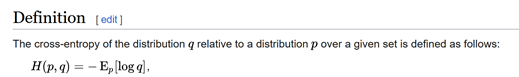

## KL divergence

In [1]:
# 0.0 Prepare to display YouTube videos
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import YouTubeVideo

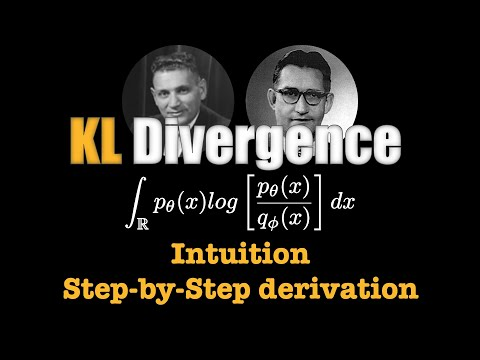

In [2]:
# KL Divergence - Intution
YouTubeVideo('9_eZHt2qJs4')

In mathematical statistics, the Kullback–Leibler divergence (also called relative entropy and I-divergence), denoted $D_{KL}$ ( P ∥ Q ), is a type of statistical distance: a measure of how one probability distribution P is different from a second, reference probability distribution Q. A simple interpretation of the KL divergence of P from Q is the expected excess surprise from using Q as a model when the actual distribution is P. While it is a distance, it is not a metric, the most familiar type of distance: it is not symmetric in the two distributions (in contrast to variation of information), and does not satisfy the triangle inequality. It is given by:

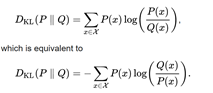

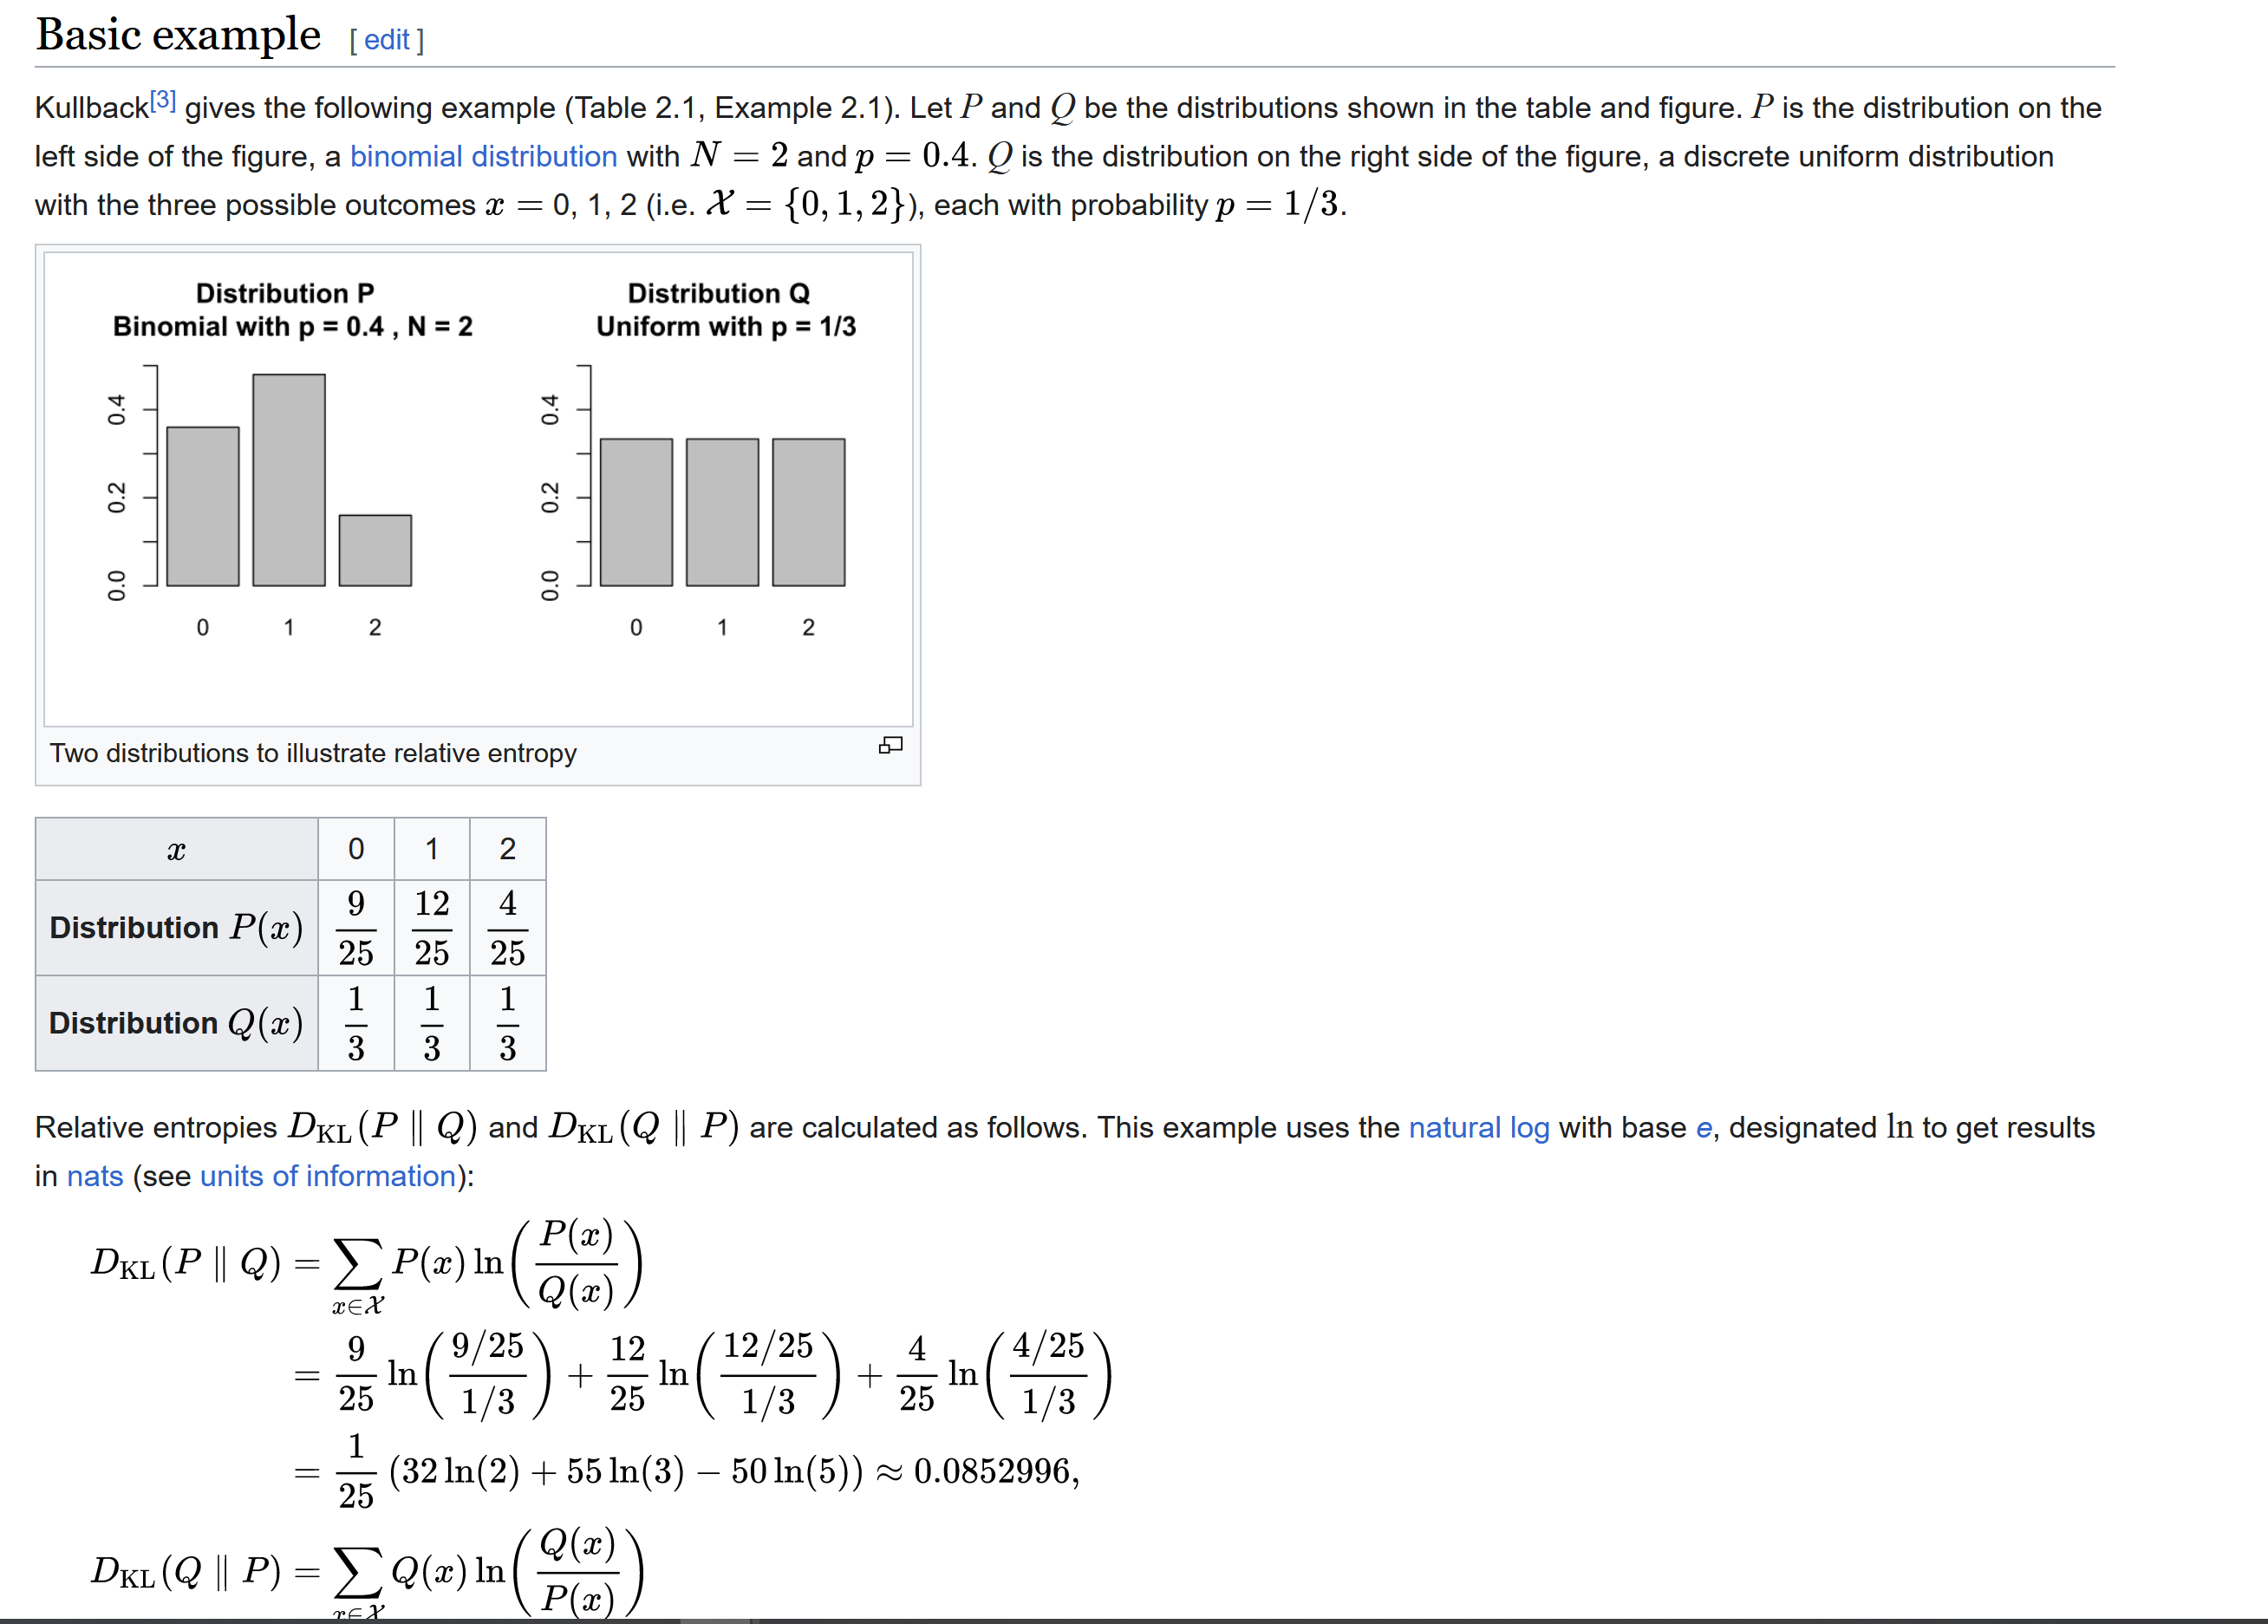

In [ ]:
########################